In [1]:
from google.colab import userdata
import os
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [2]:
!kaggle datasets download -d milanvaddoriya/data-science-job-salary
! unzip "data-science-job-salary.zip"

Dataset URL: https://www.kaggle.com/datasets/milanvaddoriya/data-science-job-salary
License(s): other
  0% 0.00/9.97k [00:00<?, ?B/s]
100% 9.97k/9.97k [00:00<00:00, 17.5MB/s]
Archive:  data-science-job-salary.zip
  inflating: datascience_salaries.csv  


In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
data=pd.read_csv("datascience_salaries.csv")

In [16]:
data.head()

,job_title,job_type,experience_level,location,salary_currency,salary
0,Data scientist,Full Time,Senior,New York City,USD,149000
1,Data scientist,Full Time,Senior,Boston,USD,120000
2,Data scientist,Full Time,Senior,London,USD,68000
6,Data scientist,Full Time,Senior,Research Triangle Park,USD,69000
7,Data scientist,Full Time,Senior,Sydney,USD,68000


In [10]:
data.describe(include="all")

,job_title,job_type,experience_level,location,salary_currency,salary
count,826,826,826,826,826,826.000000
unique,5,2,4,320,3,NaN
top,Data scientist,Full Time,Senior,New York City,USD,NaN
freq,266,798,489,28,815,NaN
mean,NaN,NaN,NaN,NaN,NaN,66144.067797
std,NaN,NaN,NaN,NaN,NaN,34953.056934
min,NaN,NaN,NaN,NaN,NaN,30000.000000
25%,NaN,NaN,NaN,NaN,NaN,43000.000000
50%,NaN,NaN,NaN,NaN,NaN,63000.000000
75%,NaN,NaN,NaN,NaN,NaN,68000.000000


In [18]:
data.isnull().sum()

job_title           0
job_type            0
experience_level    0
location            0
salary_currency     0
salary              0
dtype: int64

In [14]:
data.isna().sum()

job_title           0
job_type            0
experience_level    0
location            0
salary_currency     0
salary              0
dtype: int64

In [9]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)
data.drop_duplicates(inplace=True)

In [17]:
data['experience_level'].unique()

array(['Senior', 'Entry', 'Mid', 'Executive'], dtype=object)

In [20]:
grouped_data = data.groupby('experience_level')

In [21]:
mean_salaries = grouped_data['salary'].mean()
median_salaries = grouped_data['salary'].median()

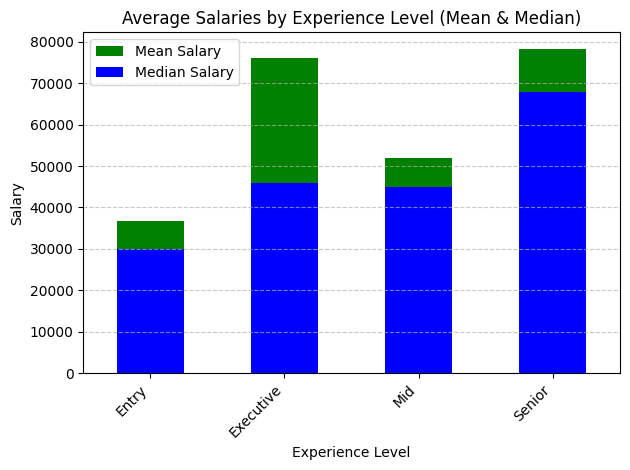

In [25]:
mean_salaries.plot(kind='bar', color='green', label='Mean Salary')
median_salaries.plot(kind='bar', color='blue', label='Median Salary')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.title('Average Salaries by Experience Level (Mean & Median)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()